## Jupyter notebook for plotting supplementary fig. 10 a-c

This notebook is the code for plotting temporal changes of CHi-C, ATAC-seq and RNA-seq on peak sites intersected with CTCF/H3K27AC (Supplementary Fig. 10a-c) as illustrated in the paper "**\"Analysis of chromatin organinization and gene expression in T cells identifies functional genes for rheumatoid arthritis\"** by *Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Xiangyu Ge, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre*

Author : *Jing Yang*  <br />
Date: 01-05-2020 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

In [1]:

library(tidyverse)
library(reshape2)
library(gridExtra)
library(data.table)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
ATACseq_clustered <- read.csv('data/ATACseq_withcluster.txt', header=T)

In [3]:
linked_data <- read.table('data/ATACseq_CHiC_RNAseq_linked_withpromoter.txt', header=T)

In [4]:
dim(linked_data)

[1] 76914    66

In [5]:
ATACseq_idx <- c('ATACchr','ATACstart','ATACend','AT0','AT20','AT1H','AT2H','AT4H','AT24H')

In [6]:
ATACseq_data_all <- unique(linked_data[,ATACseq_idx])

In [7]:
names(ATACseq_clustered) <- c('ATACchr','ATACstart','ATACend','ATACwidth',
                              'AT0','AT20','AT1H','AT2H','AT4H','AT24H','ALR','ACluster') 

In [8]:
merged_clusteredonly <- unique(merge(ATACseq_clustered, linked_data))
dim(merged_clusteredonly)

[1] 8153   69

### read ATACseq intersected with CTCF and H3K427AC. 

In [9]:

ATACseq_with_TF <- fread('data/ATACseq_peak_withCTCF_H3K27AC.bed',header=F, sep='\t')

In [10]:
names(ATACseq_with_TF) <- c('ATACchr','ATACstart','ATACend','TF')

In [11]:
#merged_data_new <- unique(merge(linked_data, ATACseq_with_TF, all=TRUE))
merged_data <- unique(merge(merged_clusteredonly, ATACseq_with_TF, all=TRUE))


In [12]:
merged_data$TF[is.na(merged_data$TF)] <- 'Others'

In [13]:
head(merged_data)

,ATACchr,ATACstart,ATACend,AT0,AT20,AT1H,AT2H,AT4H,AT24H,ATACwidth,⋯,corr_atacseq_gene,corr_atacseq_otherEnd,corr_gene_otherEnd,BIC_atacseq,LR_atacseq,BIC_chic,LR_chic,BIC_gene,LR_gene,TF
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,chr1,984284,984405,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,CTCF
2,chr1,1040483,1040896,7.900938,7.986564,7.931974,7.621835,7.503944,7.269499,414,⋯,-0.8996507,-0.7455293,4.299895e-01,-2.969029,-4.760788,1.79200,0.0002405170,-17.527654,-19.319414,CTCF
3,chr1,1068759,1068972,7.218716,6.998478,6.689556,6.772565,6.518431,6.311069,214,⋯,0.7293234,-0.6690165,-9.815306e-01,-3.176320,-4.968079,NA,NA,-5.409763,-7.201523,Others
4,chr1,1068759,1068972,7.218716,6.998478,6.689556,6.772565,6.518431,6.311069,214,⋯,-0.6224007,-0.6690165,-6.818388e-07,-3.176320,-4.968079,NA,NA,-28.686864,-30.478623,Others
5,chr1,1068759,1068972,7.218716,6.998478,6.689556,6.772565,6.518431,6.311069,214,⋯,-0.8281001,-0.5471011,4.447600e-01,-3.176320,-4.968079,1.79189,0.0001305548,-17.527654,-19.319414,Others
6,chr1,1069266,1069663,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,CTCF


In [14]:
merged_data_new <- merged_data[complete.cases(merged_data),]
dim(merged_data_new)

[1] 5249   70

In [15]:
table(merged_data_new$TF)


        CTCF CTCF,H3K27AC      H3K27AC       Others 
        1121          184          754         3190 

In [16]:
idx_atacseq <- c('ATACchr','ATACstart','ATACend','AT0','AT20','AT1H','AT2H','AT4H','AT24H','ACluster')
idx_atacseq_time <- c('AT0','AT20','AT1H','AT2H','AT4H','AT24H')
idx_chic <- c('baitID','otherEndID','T0','T20','T1H','T4H','T24H','ACluster')
idx_chic_time <- c('T0','T20','T1H','T4H','T24H')
idx_atacseq_time <- c('AT0','AT20','AT1H','AT2H','AT4H','AT24H')
idx_gene <- c('ENSG','ET0_a','ET20_a','ET1H_a','ET2H_a','ET4H_a','ET24H_a','ACluster')
idx_gene_time <- c('ET0_a','ET20_a','ET1H_a','ET2H_a','ET4H_a','ET24H_a')

In [17]:
data_atacseq_CTCF <- unique(merged_data_new%>% filter(TF %in% 'CTCF') %>% select(all_of(idx_atacseq)))
data_atacseq_CTCF_uniq <- data.frame(t(scale(t(unique(data_atacseq_CTCF)[,idx_atacseq_time]), center=TRUE, scale=TRUE)))
data_atacseq_CTCF_uniq$cluster <- data_atacseq_CTCF$ACluster
data_atacseq_other <- unique(merged_data_new%>% filter(TF %in% 'Others') %>% select(all_of(idx_atacseq)))
data_atacseq_other_uniq <- data.frame(t(scale(t(unique(data_atacseq_other)[,idx_atacseq_time]), center=TRUE, scale=TRUE)))
data_atacseq_other_uniq$cluster <- data_atacseq_other$ACluster
data_atacseq_H3K27AC <- unique(merged_data_new%>% filter(TF %in% 'H3K27AC') %>% select(all_of(idx_atacseq)))
data_atacseq_H3K27AC_uniq <- data.frame(t(scale(t(unique(data_atacseq_H3K27AC)[,idx_atacseq_time]), center=TRUE, scale=TRUE)))
data_atacseq_H3K27AC_uniq$cluster <- data_atacseq_H3K27AC$ACluster
data_atacseq_CTCFandH3K27AC <- unique(merged_data_new%>% filter(TF %in% 'CTCF,H3K27AC') %>% select(all_of(idx_atacseq)))
data_atacseq_CTCFandH3K27AC_uniq <- data.frame(t(scale(t(unique(data_atacseq_CTCFandH3K27AC)[,idx_atacseq_time]), center=TRUE, scale=TRUE)))
data_atacseq_CTCFandH3K27AC_uniq$cluster <- data_atacseq_CTCFandH3K27AC$ACluster

In [18]:
data_chic_CTCF <- unique(merged_data_new%>% filter(TF %in% 'CTCF') %>% select(all_of(idx_chic)))
data_chic_CTCF_uniq <- data.frame(t(scale(t(unique(data_chic_CTCF)[,idx_chic_time]), center=TRUE, scale=TRUE)))
data_chic_CTCF_uniq$cluster <- data_chic_CTCF$ACluster
data_chic_other <- unique(merged_data_new%>% filter(TF %in% 'Others') %>% select(all_of(idx_chic)))
data_chic_other_uniq <- data.frame(t(scale(t(unique(data_chic_other)[,idx_chic_time]), center=TRUE, scale=TRUE)))
data_chic_other_uniq$cluster <- data_chic_other$ACluster
data_chic_H3K27AC <- unique(merged_data_new%>% filter(TF %in% 'H3K27AC') %>% select(all_of(idx_chic)))
data_chic_H3K27AC_uniq <- data.frame(t(scale(t(unique(data_chic_H3K27AC)[,idx_chic_time]), center=TRUE, scale=TRUE)))
data_chic_H3K27AC_uniq$cluster <- data_chic_H3K27AC$ACluster
data_chic_CTCFandH3K27AC <- unique(merged_data_new%>% filter(TF %in% 'CTCF,H3K27AC') %>% select(all_of(idx_chic)))
data_chic_CTCFandH3K27AC_uniq <- data.frame(t(scale(t(unique(data_chic_CTCFandH3K27AC)[,idx_chic_time]), center=TRUE, scale=TRUE)))
data_chic_CTCFandH3K27AC_uniq$cluster <- data_chic_CTCFandH3K27AC$ACluster

In [19]:
data_gene_CTCF <- unique(merged_data_new%>% filter(TF %in% 'CTCF') %>% select(all_of(idx_gene)))
data_gene_CTCF_uniq <- data.frame(t(scale(t(unique(data_gene_CTCF)[,idx_gene_time]), center=TRUE, scale=TRUE)))
data_gene_CTCF_uniq$cluster <- data_gene_CTCF$ACluster
data_gene_other <- unique(merged_data_new%>% filter(TF %in% 'Others') %>% select(all_of(idx_gene)))
data_gene_other_uniq <- data.frame(t(scale(t(unique(data_gene_other)[,idx_gene_time]), center=TRUE, scale=TRUE)))
data_gene_other_uniq$cluster <- data_gene_other$ACluster
data_gene_H3K27AC <- unique(merged_data_new%>% filter(TF %in% 'H3K27AC') %>% select(all_of(idx_gene)))
data_gene_H3K27AC_uniq <- data.frame(t(scale(t(unique(data_gene_H3K27AC)[,idx_gene_time]), center=TRUE, scale=TRUE)))
data_gene_H3K27AC_uniq$cluster <- data_gene_H3K27AC$ACluster
data_gene_CTCFandH3K27AC <- unique(merged_data_new%>% filter(TF %in% 'CTCF,H3K27AC') %>% select(all_of(idx_gene)))
data_gene_CTCFandH3K27AC_uniq <- data.frame(t(scale(t(unique(data_gene_CTCFandH3K27AC)[,idx_gene_time]), center=TRUE, scale=TRUE)))
data_gene_CTCFandH3K27AC_uniq$cluster <- data_gene_CTCFandH3K27AC$ACluster

In [20]:
time0 <- c('T0','T20','T1H','T2H','T4H','T24H')
time1 <- c('T0','T20','T1H','T4H','T24H')


In [21]:
head(data_chic_CTCF_uniq)

,T0,T20,T1H,T4H,T24H,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-0.1160042,-0.87145759,-0.1751399,-0.5413321,1.7039338,3
2,-0.5929011,-0.79539793,-0.0514268,-0.2743102,1.7140361,3
3,0.8036153,-1.37170536,-0.6896976,0.9497748,0.3080129,3
4,1.6837723,-0.02546019,-0.1483675,-0.7211842,-0.7887604,3
6,0.3745042,-1.46342362,0.1289088,-0.3076209,1.2676316,3
8,0.3747024,-1.26406476,0.4192664,1.2288937,-0.7587979,3


In [22]:
names(data_atacseq_CTCF_uniq) <- c(time0, 'Cluster')
names(data_atacseq_other_uniq) <- c(time0, 'Cluster')
names(data_atacseq_H3K27AC_uniq) <- c(time0, 'Cluster')
names(data_atacseq_CTCFandH3K27AC_uniq) <- c(time0, 'Cluster')
names(data_chic_CTCF_uniq) <- c(time1,'Cluster')
names(data_chic_other_uniq) <- c(time1, 'Cluster')
names(data_chic_H3K27AC_uniq) <- c(time1, 'Cluster')
names(data_chic_CTCFandH3K27AC_uniq) <- c(time1,'Cluster')
names(data_gene_CTCF_uniq) <- c(time0, 'Cluster')
names(data_gene_other_uniq) <- c(time0, 'Cluster')
names(data_gene_H3K27AC_uniq) <- c(time0, 'Cluster')
names(data_gene_CTCFandH3K27AC_uniq) <- c(time0, 'Cluster')

In [23]:
head(data_atacseq_other_uniq)

,T0,T20,T1H,T2H,T4H,T24H,Cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.43261199,0.7573468,-0.18983144,0.06468115,-0.7145111,-1.350297,3
2,1.59246144,0.3695085,-1.04120346,-0.26180962,0.3625364,-1.021493,5
3,-0.03621339,0.6450562,0.70956681,0.24031463,0.4052358,-1.963960,3
4,-0.73242568,-0.3163020,-0.83972653,-0.48231330,0.6306453,1.740122,4
6,-0.36183482,-1.3283475,-0.40886114,-0.20194351,0.7974004,1.503587,0
7,-1.42050539,-0.8936428,0.02740562,0.24723066,0.8750349,1.164477,0


In [24]:
data_atacseq_CTCF_uniq$label <- 1:dim(data_atacseq_CTCF_uniq)[1]
data_atacseq_other_uniq$label <- 1:dim(data_atacseq_other_uniq)[1]
data_atacseq_H3K27AC_uniq$label <- 1:dim(data_atacseq_H3K27AC_uniq)[1]
data_atacseq_CTCFandH3K27AC_uniq$label <- 1:dim(data_atacseq_CTCFandH3K27AC_uniq)[1]
data_chic_CTCF_uniq$label <- 1:dim(data_chic_CTCF_uniq)[1]
data_chic_other_uniq$label <- 1:dim(data_chic_other_uniq)[1]
data_chic_H3K27AC_uniq$label <- 1:dim(data_chic_H3K27AC_uniq)[1]
data_chic_CTCFandH3K27AC_uniq$label <- 1:dim(data_chic_CTCFandH3K27AC_uniq)[1]
data_gene_CTCF_uniq$label <- 1:dim(data_gene_CTCF_uniq)[1]
data_gene_other_uniq$label <- 1:dim(data_gene_other_uniq)[1]
data_gene_H3K27AC_uniq$label <- 1:dim(data_gene_H3K27AC_uniq)[1]
data_gene_CTCFandH3K27AC_uniq$label <- 1:dim(data_gene_CTCFandH3K27AC_uniq)[1]


In [25]:
kmeans_cluster <- function(tmp_data, CLUSTER_SIZE=4){
set.seed(5)
cluster_results <- kmeans(tmp_data,centers=CLUSTER_SIZE,iter.max = 100)

cluster_ranked <- dense_rank(cluster_results$cluster)
return(cluster_ranked)
}


In [26]:
data_atacseq_CTCF_uniq$OwnCluster <- kmeans_cluster(data_atacseq_CTCF_uniq[,time0])
data_atacseq_other_uniq$OwnCluster <- kmeans_cluster(data_atacseq_other_uniq[,time0])
data_atacseq_H3K27AC_uniq$OwnCluster <- kmeans_cluster(data_atacseq_H3K27AC_uniq[,time0])
data_atacseq_CTCFandH3K27AC_uniq$OwnCluster <- kmeans_cluster(data_atacseq_CTCFandH3K27AC_uniq[,time0])

In [27]:

data_chic_CTCF_uniq$OwnCluster <- kmeans_cluster(data_chic_CTCF_uniq[,time1])
data_chic_other_uniq$OwnCluster <- kmeans_cluster(data_chic_other_uniq[,time1])
data_chic_H3K27AC_uniq$OwnCluster <- kmeans_cluster(data_chic_H3K27AC_uniq[,time1])
data_chic_CTCFandH3K27AC_uniq$OwnCluster <- kmeans_cluster(data_chic_CTCFandH3K27AC_uniq[,time1])


In [28]:
data_gene_CTCF_uniq$OwnCluster <- kmeans_cluster(data_gene_CTCF_uniq[,time0])
data_gene_other_uniq$OwnCluster <- kmeans_cluster(data_gene_other_uniq[,time0])
data_gene_H3K27AC_uniq$OwnCluster <- kmeans_cluster(data_gene_H3K27AC_uniq[,time0])
data_gene_CTCFandH3K27AC_uniq$OwnCluster <- kmeans_cluster(data_gene_CTCFandH3K27AC_uniq[,time0])

In [29]:
head(data_chic_CTCF_uniq)

,T0,T20,T1H,T4H,T24H,Cluster,label,OwnCluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,-0.1160042,-0.87145759,-0.1751399,-0.5413321,1.7039338,3,1,1
2,-0.5929011,-0.79539793,-0.0514268,-0.2743102,1.7140361,3,2,1
3,0.8036153,-1.37170536,-0.6896976,0.9497748,0.3080129,3,3,1
4,1.6837723,-0.02546019,-0.1483675,-0.7211842,-0.7887604,3,4,3
6,0.3745042,-1.46342362,0.1289088,-0.3076209,1.2676316,3,5,1
8,0.3747024,-1.26406476,0.4192664,1.2288937,-0.7587979,3,6,4


In [30]:
table(data_chic_CTCF_uniq$OwnCluster)


  1   2   3   4 
336 234 263 161 

In [31]:
sign_data_atacseq_CTCF_uniq <- data_atacseq_CTCF_uniq[FALSE,]
sign_data_atacseq_other_uniq <- data_atacseq_other_uniq[FALSE,]
sign_data_atacseq_H3K27AC_uniq <- data_atacseq_H3K27AC_uniq[FALSE,]
sign_data_atacseq_CTCFandH3K27AC_uniq <- data_atacseq_CTCFandH3K27AC_uniq[FALSE,]

sign_data_atacseq_CTCF_uniq <- sign(data_atacseq_CTCF_uniq[,time0])
sign_data_atacseq_CTCF_uniq$Cluster <- data_atacseq_CTCF_uniq$Cluster
sign_data_atacseq_other_uniq <- sign(data_atacseq_other_uniq[,time0])
sign_data_atacseq_other_uniq$Cluster <- data_atacseq_other_uniq$Cluster
sign_data_atacseq_H3K27AC_uniq <- sign(data_atacseq_H3K27AC_uniq[,time0])
sign_data_atacseq_H3K27AC_uniq$Cluster <- data_atacseq_H3K27AC_uniq$Cluster
sign_data_atacseq_CTCFandH3K27AC_uniq <- sign(data_atacseq_CTCFandH3K27AC_uniq[,time0])
sign_data_atacseq_CTCFandH3K27AC_uniq$Cluster <- data_atacseq_CTCFandH3K27AC_uniq$Cluster


In [32]:
sign_data_chic_CTCF_uniq <- data_chic_CTCF_uniq[FALSE,]
sign_data_chic_other_uniq <- data_chic_other_uniq[FALSE,]
sign_data_chic_H3K27AC_uniq <- data_chic_H3K27AC_uniq[FALSE,]
sign_data_chic_CTCFandH3K27AC_uniq <- data_chic_CTCFandH3K27AC_uniq[FALSE,]

sign_data_chic_CTCF_uniq <- sign(data_chic_CTCF_uniq[,time1])
sign_data_chic_CTCF_uniq$Cluster <- data_chic_CTCF_uniq$Cluster
sign_data_chic_other_uniq <- sign(data_chic_other_uniq[,time1])
sign_data_chic_other_uniq$Cluster <- data_chic_other_uniq$Cluster
sign_data_chic_H3K27AC_uniq <- sign(data_chic_H3K27AC_uniq[,time1])
sign_data_chic_H3K27AC_uniq$Cluster <- data_chic_H3K27AC_uniq$Cluster
sign_data_chic_CTCFandH3K27AC_uniq <- sign(data_chic_CTCFandH3K27AC_uniq[,time1])
sign_data_chic_CTCFandH3K27AC_uniq$Cluster <- data_chic_CTCFandH3K27AC_uniq$Cluster


In [33]:
sign_data_gene_CTCF_uniq <- data_gene_CTCF_uniq[FALSE,]
sign_data_gene_other_uniq <- data_gene_other_uniq[FALSE,]
sign_data_gene_H3K27AC_uniq <- data_gene_H3K27AC_uniq[FALSE,]
sign_data_gene_CTCFandH3K27AC_uniq <- data_gene_CTCFandH3K27AC_uniq[FALSE,]

sign_data_gene_CTCF_uniq <- sign(data_gene_CTCF_uniq[,time0])
sign_data_gene_CTCF_uniq$Cluster <- data_gene_CTCF_uniq$Cluster
sign_data_gene_other_uniq <- sign(data_gene_other_uniq[,time0])
sign_data_gene_other_uniq$Cluster <- data_gene_other_uniq$Cluster
sign_data_gene_H3K27AC_uniq <- sign(data_gene_H3K27AC_uniq[,time0])
sign_data_gene_H3K27AC_uniq$Cluster <- data_gene_H3K27AC_uniq$Cluster
sign_data_gene_CTCFandH3K27AC_uniq <- sign(data_gene_CTCFandH3K27AC_uniq[,time0])
sign_data_gene_CTCFandH3K27AC_uniq$Cluster <- data_gene_CTCFandH3K27AC_uniq$Cluster

In [34]:
head(sign_data_atacseq_CTCF_uniq)

,T0,T20,T1H,T2H,T4H,T24H,Cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,1,-1,-1,-1,3
2,1,1,1,-1,-1,-1,3
9,-1,1,-1,-1,-1,1,2
10,1,1,1,-1,-1,-1,3
12,1,1,1,-1,-1,-1,3
13,-1,1,-1,-1,-1,1,2


In [35]:
sorted_atacseq_CTCF <- sign_data_atacseq_CTCF_uniq[with(sign_data_atacseq_CTCF_uniq, order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_atacseq_CTCF$label <- 1:dim(sorted_atacseq_CTCF)[1]
sorted_atacseq_other <- sign_data_atacseq_other_uniq[with(sign_data_atacseq_other_uniq, order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_atacseq_other$label <- 1:dim(sorted_atacseq_other)[1]
sorted_atacseq_H3K27AC <- sign_data_atacseq_H3K27AC_uniq[with(sign_data_atacseq_H3K27AC_uniq, order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_atacseq_H3K27AC$label <- 1:dim(sorted_atacseq_H3K27AC)[1]
sorted_atacseq_CTCFandH3K27AC <- sign_data_atacseq_CTCFandH3K27AC_uniq[with(sign_data_atacseq_CTCFandH3K27AC_uniq, 
                                                                            order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_atacseq_CTCFandH3K27AC$label <- 1:dim(sorted_atacseq_CTCFandH3K27AC)[1]

sorted_chic_CTCF <- sign_data_chic_CTCF_uniq[with(sign_data_chic_CTCF_uniq, order(T0,T20,T1H,T4H,T24H)), ]
sorted_chic_CTCF$label <- 1:dim(sorted_chic_CTCF)[1]
sorted_chic_other <- sign_data_chic_other_uniq[with(sign_data_chic_other_uniq, order(T0,T20,T1H,T4H,T24H)), ]
sorted_chic_other$label <- 1:dim(sorted_chic_other)[1]
sorted_chic_H3K27AC <- sign_data_chic_H3K27AC_uniq[with(sign_data_chic_H3K27AC_uniq, order(T0,T20,T1H,T4H,T24H)), ]
sorted_chic_H3K27AC$label <- 1:dim(sorted_chic_H3K27AC)[1]
sorted_chic_CTCFandH3K27AC <- sign_data_chic_CTCFandH3K27AC_uniq[with(sign_data_chic_CTCFandH3K27AC_uniq, 
                                                                      order(T0,T20,T1H,T4H,T24H)), ]
sorted_chic_CTCFandH3K27AC$label <- 1:dim(sorted_chic_CTCFandH3K27AC)[1]

sorted_gene_CTCF <- sign_data_gene_CTCF_uniq[with(sign_data_gene_CTCF_uniq, order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_gene_CTCF$label <- 1:dim(sorted_gene_CTCF)[1]
sorted_gene_other <- sign_data_gene_other_uniq[with(sign_data_gene_other_uniq, order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_gene_other$label <- 1:dim(sorted_gene_other)[1]
sorted_gene_H3K27AC <- sign_data_gene_H3K27AC_uniq[with(sign_data_gene_H3K27AC_uniq, order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_gene_H3K27AC$label <- 1:dim(sorted_gene_H3K27AC)[1]
sorted_gene_CTCFandH3K27AC <- sign_data_gene_CTCFandH3K27AC_uniq[with(sign_data_gene_CTCFandH3K27AC_uniq, 
                                                                      order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_gene_CTCFandH3K27AC$label <- 1:dim(sorted_gene_CTCFandH3K27AC)[1]

In [36]:
melted_atacseq_CTCF <- gather(data_atacseq_CTCF_uniq, 'time','value',-label,-Cluster)


In [37]:
idx_data1 <- c('T0', 'T20','T1H','T4H','T24H','label','OwnCluster')
idx_data2 <- c('T0', 'T20','T1H','T4H','T24H','label','OwnCluster')


In [38]:
melted_atacseq_CTCF <- gather(data_atacseq_CTCF_uniq, 'time','value',-label,-OwnCluster)
melted_atacseq_other <- gather(data_atacseq_other_uniq[,idx_data1], 'time','value',-label,-OwnCluster)
melted_atacseq_H3K27AC <- gather(data_atacseq_H3K27AC_uniq[,idx_data1], 'time','value',-label,-OwnCluster)

melted_atacseq_CTCFandH3K27AC <- gather(data_atacseq_CTCFandH3K27AC_uniq[,idx_data1], 'time','value',-label,-OwnCluster)
melted_atacseq_CTCF$category <- 'ATAC-seq'
melted_atacseq_CTCF$type <- 'CTCF'
melted_atacseq_other$category <- 'ATAC-seq'
melted_atacseq_other$type <- 'Other'
melted_atacseq_H3K27AC$category <- 'ATAC-seq'
melted_atacseq_H3K27AC$type <- 'H3K27AC'
melted_atacseq_CTCFandH3K27AC$category <- 'ATAC-seq'
melted_atacseq_CTCFandH3K27AC$type <- 'CTCFandH3K27AC'
#### chic
melted_chic_CTCF <- gather(data_chic_CTCF_uniq[,idx_data2], 'time','value',-label,-OwnCluster)
melted_chic_other <- gather(data_chic_other_uniq[,idx_data2], 'time','value',-label,-OwnCluster)
melted_chic_H3K27AC <- gather(data_chic_H3K27AC_uniq[,idx_data2], 'time','value',-label,-OwnCluster)

melted_chic_CTCFandH3K27AC <- gather(data_chic_CTCFandH3K27AC_uniq[,idx_data2], 'time','value',-label,-OwnCluster)
melted_chic_CTCF$category <- 'CHi-C'
melted_chic_CTCF$type <- 'CTCF'
melted_chic_other$category <- 'CHi-C'
melted_chic_other$type <- 'Other'
melted_chic_H3K27AC$category <- 'CHi-C'
melted_chic_H3K27AC$type <- 'H3K27AC'
melted_chic_CTCFandH3K27AC$category <- 'CHi-C'
melted_chic_CTCFandH3K27AC$type <- 'CTCFandH3K27AC'

### gene
melted_gene_CTCF <- gather(data_gene_CTCF_uniq[,idx_data1], 'time','value',-label,-OwnCluster)
melted_gene_other <- gather(data_gene_other_uniq[,idx_data1], 'time','value',-label,-OwnCluster)
melted_gene_H3K27AC <- gather(data_gene_H3K27AC_uniq[,idx_data1], 'time','value',-label,-OwnCluster)

melted_gene_CTCFandH3K27AC <- gather(data_gene_CTCFandH3K27AC_uniq[,idx_data1], 'time','value',-label,-OwnCluster)
melted_gene_CTCF$category <- 'Gene'
melted_gene_CTCF$type <- 'CTCF'
melted_gene_other$category <- 'Gene'
melted_gene_other$type <- 'Other'
melted_gene_H3K27AC$category <- 'Gene'
melted_gene_H3K27AC$type <- 'H3K27AC'
melted_gene_CTCFandH3K27AC$category <- 'Gene'
melted_gene_CTCFandH3K27AC$type <- 'CTCFandH3K27AC'

### combined melted data
melted_CTCF <- rbind(melted_atacseq_CTCF, melted_chic_CTCF, melted_gene_CTCF)
melted_other <- rbind(melted_atacseq_other, melted_chic_other, melted_gene_other)
melted_H3K27AC <- rbind(melted_atacseq_H3K27AC, melted_chic_H3K27AC, melted_gene_H3K27AC)

melted_CTCFandH3K27AC <- rbind(melted_atacseq_CTCFandH3K27AC, melted_chic_CTCFandH3K27AC, melted_gene_CTCFandH3K27AC)

melted_all <- rbind(melted_CTCF, melted_other, melted_H3K27AC, melted_CTCFandH3K27AC)
melted_all$time <- factor(melted_all$time, levels=c('T0','T20','T1H','T2H','T4H','T24H'))

In [39]:
head(sorted_atacseq_CTCF)

,T0,T20,T1H,T2H,T4H,T24H,Cluster,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
212,-1,-1,-1,-1,-1,1,4,1
454,-1,-1,-1,-1,-1,1,4,2
514,-1,-1,-1,-1,-1,1,4,3
840,-1,-1,-1,-1,-1,1,4,4
873,-1,-1,-1,-1,-1,1,4,5
80,-1,-1,-1,1,1,-1,0,6


In [40]:
sign_idx_data2 <- c('T0', 'T20','T1H','T4H','T24H','label','Cluster')


In [41]:
sign_melted_atacseq_CTCF <- gather(sorted_atacseq_CTCF[,sign_idx_data2], 'time','value',-label,-Cluster)
sign_melted_atacseq_other <- gather(sorted_atacseq_other[,sign_idx_data2], 'time','value',-label,-Cluster)
sign_melted_atacseq_H3K27AC <- gather(sorted_atacseq_H3K27AC[,sign_idx_data2], 'time','value',-label,-Cluster)

sign_melted_atacseq_CTCFandH3K27AC <- gather(sorted_atacseq_CTCFandH3K27AC[,sign_idx_data2], 'time','value',-label,-Cluster)
sign_melted_atacseq_CTCF$category <- 'ATAC-seq'
sign_melted_atacseq_CTCF$type <- 'CTCF'
sign_melted_atacseq_other$category <- 'ATAC-seq'
sign_melted_atacseq_other$type <- 'Other'
sign_melted_atacseq_H3K27AC$category <- 'ATAC-seq'
sign_melted_atacseq_H3K27AC$type <- 'H3K27AC'
sign_melted_atacseq_CTCFandH3K27AC$category <- 'ATAC-seq'
sign_melted_atacseq_CTCFandH3K27AC$type <- 'CTCFandH3K27AC'
#### chic
sign_melted_chic_CTCF <- gather(sorted_chic_CTCF, 'time','value',-label,-Cluster)
sign_melted_chic_other <- gather(sorted_chic_other, 'time','value',-label,-Cluster)
sign_melted_chic_H3K27AC <- gather(sorted_chic_H3K27AC, 'time','value',-label,-Cluster)

sign_melted_chic_CTCFandH3K27AC <- gather(sorted_chic_CTCFandH3K27AC, 'time','value',-label,-Cluster)
sign_melted_chic_CTCF$category <- 'CHi-C'
sign_melted_chic_CTCF$type <- 'CTCF'
sign_melted_chic_other$category <- 'CHi-C'
sign_melted_chic_other$type <- 'Other'
sign_melted_chic_H3K27AC$category <- 'CHi-C'
sign_melted_chic_H3K27AC$type <- 'H3K27AC'
sign_melted_chic_CTCFandH3K27AC$category <- 'CHi-C'
sign_melted_chic_CTCFandH3K27AC$type <- 'CTCFandH3K27AC'

### gene
sign_melted_gene_CTCF <- gather(sorted_gene_CTCF[,sign_idx_data2], 'time','value',-label,-Cluster)
sign_melted_gene_other <- gather(sorted_gene_other[,sign_idx_data2], 'time','value',-label,-Cluster)
sign_melted_gene_H3K27AC <- gather(sorted_gene_H3K27AC[,sign_idx_data2], 'time','value',-label,-Cluster)

sign_melted_gene_CTCFandH3K27AC <- gather(sorted_gene_CTCFandH3K27AC[,sign_idx_data2], 'time','value',-label,-Cluster)
sign_melted_gene_CTCF$category <- 'Gene'
sign_melted_gene_CTCF$type <- 'CTCF'
sign_melted_gene_other$category <- 'Gene'
sign_melted_gene_other$type <- 'Other'
sign_melted_gene_H3K27AC$category <- 'Gene'
sign_melted_gene_H3K27AC$type <- 'H3K27AC'
sign_melted_gene_CTCFandH3K27AC$category <- 'Gene'
sign_melted_gene_CTCFandH3K27AC$type <- 'CTCFandH3K27AC'

### combined sign_melted data
sign_melted_CTCF <- rbind(sign_melted_atacseq_CTCF, sign_melted_chic_CTCF, sign_melted_gene_CTCF)
sign_melted_other <- rbind(sign_melted_atacseq_other, sign_melted_chic_other, sign_melted_gene_other)
sign_melted_H3K27AC <- rbind(sign_melted_atacseq_H3K27AC, sign_melted_chic_H3K27AC, sign_melted_gene_H3K27AC)

sign_melted_CTCFandH3K27AC <- rbind(sign_melted_atacseq_CTCFandH3K27AC, sign_melted_chic_CTCFandH3K27AC, sign_melted_gene_CTCFandH3K27AC)

sign_melted_all <- rbind(sign_melted_CTCF, sign_melted_other, sign_melted_H3K27AC, sign_melted_CTCFandH3K27AC)
#sign_melted_all$time <- factor(sign_melted_all$time, levels=c('T0','T20','T1H','T2H','T4H','T24H'))
sign_melted_all$time <- factor(sign_melted_all$time, levels=sign_idx_data2)


In [42]:
table(sign_melted_all$type)


          CTCF CTCFandH3K27AC        H3K27AC          Other 
         11070           1850           6945          29575 

Saving 6.67 x 6.67 in image



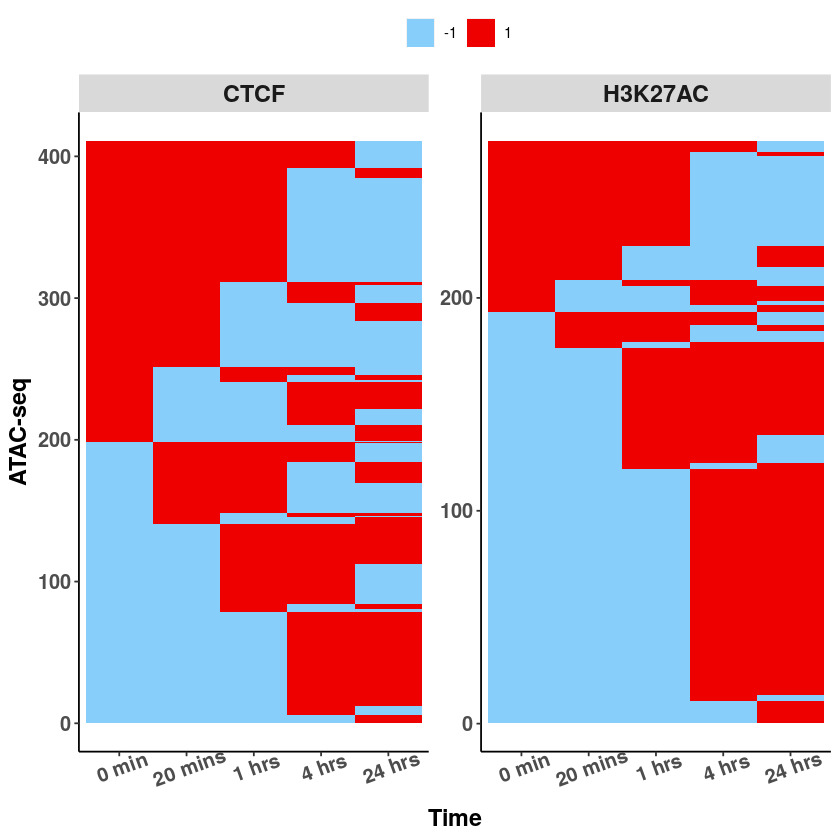

In [43]:
sign_melted_all_CTCFandH3K27AC <- subset(sign_melted_all, sign_melted_all$type %in% c('CTCF','H3K27AC'))

p_atac <- ggplot(data=subset(sign_melted_all_CTCFandH3K27AC, sign_melted_all_CTCFandH3K27AC$category %in% 'ATAC-seq'), aes(x=time, y=label, fill=factor(value), group=category)) + geom_tile(size=0.5) + 
xlab('Time') + ylab('ATAC-seq') + #ggtitle('Supplementary Fig. 10a') + 
scale_fill_manual(values=c('-1'='lightskyblue','1'='red2')) +
scale_x_discrete(breaks=c("T0","T20","T1H","T4H","T24H"),
        labels=c("0 min", "20 mins", "1 hrs", "4 hrs", "24 hrs")) +
geom_tile(size=0.2) + theme( panel.background=element_blank(), plot.title = element_text(hjust = 0.5, face='bold'), 
         axis.line=element_line(), strip.text=element_text(size=8, face='bold'),
         axis.text.x=element_text(size=12, face='bold', angle=20),
                            axis.text.y=element_text(size=12, face='bold'),
                            axis.title=element_text(size=14,face="bold"), 
                           strip.text.x=element_text(size=14, face='bold'), legend.title=element_blank(), legend.position='top') +
facet_wrap(type~., nrow=1, scales='free_y')
p_atac
#ggsave('~/Dropbox (The University of Manchester)/IntegratingATAC-RNA-HiC/Individual_Figures_Files/ATACSeq_motif/ATAC_CTCF_H3K27AC_new.pdf', p_atac)

Saving 6.67 x 6.67 in image



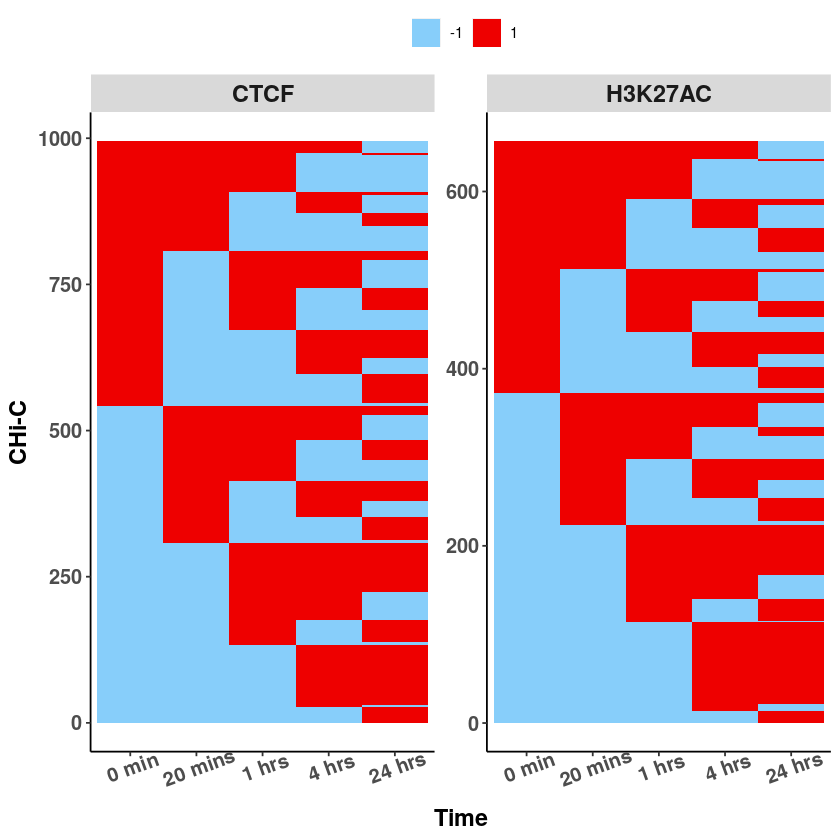

In [44]:
p_chic <- ggplot(data=subset(sign_melted_all_CTCFandH3K27AC, sign_melted_all_CTCFandH3K27AC$category %in% 'CHi-C'), aes(x=time, y=label, fill=factor(value), group=category)) + geom_tile(size=0.5) + 
xlab('Time') + ylab('CHi-C') +  #ggtitle('Supplementary Fig. 10b') +
scale_fill_manual(values=c('-1'='lightskyblue','1'='red2')) +
scale_x_discrete(breaks=c("T0","T20","T1H","T4H","T24H"),
        labels=c("0 min", "20 mins", "1 hrs", "4 hrs", "24 hrs")) +
geom_tile(size=0.2) + theme( panel.background=element_blank(), plot.title = element_text(hjust = 0.5, face='bold'), 
         axis.line=element_line(), strip.text=element_text(size=8, face='bold'),
         axis.text.x=element_text(size=12, face='bold', angle=20),
                            axis.text.y=element_text(size=12, face='bold'),
                            axis.title=element_text(size=14,face="bold"), 
                           strip.text.x=element_text(size=14, face='bold'), legend.title=element_blank(), legend.position='top') +
facet_wrap(type~., nrow=1, scales='free_y')

p_chic
#ggsave('~/Dropbox (The University of Manchester)/IntegratingATAC-RNA-HiC/Individual_Figures_Files/ATACSeq_motif/CHiC_CTCF_H3K27AC_new.pdf', p_chic)


Saving 6.67 x 6.67 in image



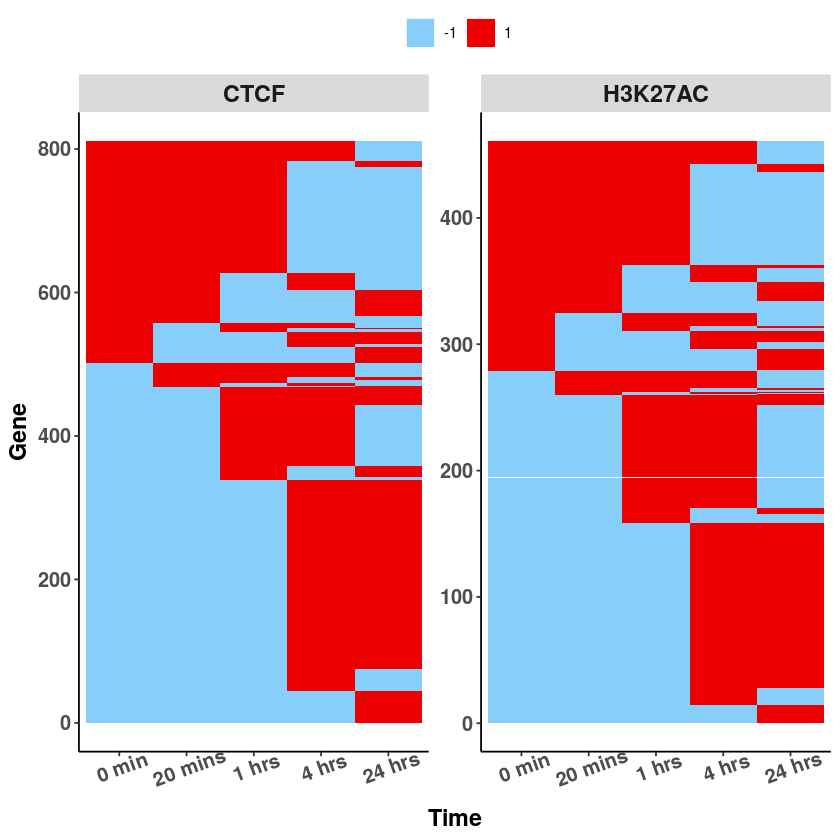

In [45]:
p_gene <- ggplot(data=subset(sign_melted_all_CTCFandH3K27AC, sign_melted_all_CTCFandH3K27AC$category %in% 'Gene'), aes(x=time, y=label, fill=factor(value), group=category)) + geom_tile(size=0.5) + 
xlab('Time') + ylab('Gene') +  #ggtitle('Supplementary Fig. 10c') +
scale_fill_manual(values=c('-1'='lightskyblue','1'='red2')) +
scale_x_discrete(breaks=c("T0","T20","T1H","T4H","T24H"),
        labels=c("0 min", "20 mins", "1 hrs", "4 hrs", "24 hrs")) +
geom_tile(size=0.2) + theme( panel.background=element_blank(), plot.title = element_text(hjust = 0.5, face='bold'), 
         axis.line=element_line(), strip.text=element_text(size=8, face='bold'),
         axis.text.x=element_text(size=12, face='bold', angle=20),
                            axis.text.y=element_text(size=12, face='bold'),
                            axis.title=element_text(size=14,face="bold"), 
                           strip.text.x=element_text(size=14, face='bold'), legend.title=element_blank(), legend.position='top') +
facet_wrap(type~., nrow=1, scales='free_y')

p_gene
#ggsave('~/Dropbox (The University of Manchester)/IntegratingATAC-RNA-HiC/Individual_Figures_Files/ATACSeq_motif/gene_CTCF_H3K27AC_new.pdf', p_gene)